<a href="https://colab.research.google.com/github/RevaLiz/folium_project_n3ts/blob/main/Mochammad_Revaliza_akbar_putra_fauzi_X3_Bengkulu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Template Tugas Project

1. import folium, pandas, geopandas, dan drive.
2. load data shapefile, pilih kota/kabupaten yang akan dianalisis
3. load data csv dan proses merge/join data
4. load peta choropleth

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import Library

import folium
import pandas as pd
import geopandas as gpd
from google.colab import drive

Pilih nama kota / kabupaten kalian. jika tidak muncul pastikan namanya sesuai dengan nama di link berikut :
https://geoservices.big.go.id/portal/apps/webappviewer/index.html?id=cb58db080712468cb4bfd408dbde3d70

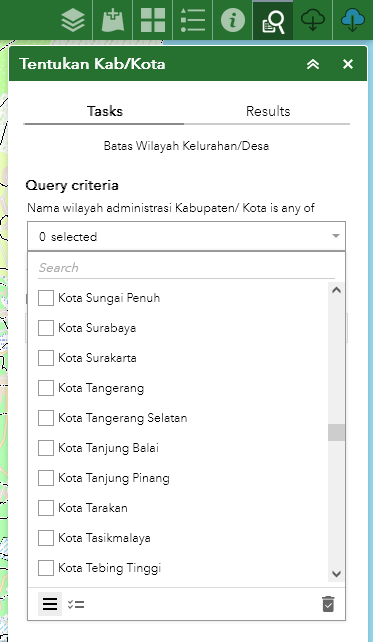

In [ ]:
# Read Data Shapefile

drive.mount('/content/drive')

# Shapefile Admin Indonesia (tidak usah diubah2) Warning! File besar 1.4gb
indonesia_admin = gpd.read_file('/content/drive/MyDrive/ADMIN_INDO/ADMINISTRASI_AR_DESAKEL_10K.shp')

# Pilih Kota/Kabupaten yang ingin ditampilkan, contoh 'Kota Tangerang Selatan'
aoi_admin = indonesia_admin[indonesia_admin['WADMKK'] == 'Kota Bengkulu']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# CSV file path
csv_path = 'jumlah data bengkulu baru lgi.csv'

# Read shapefile
admin_gdf = aoi_admin

# Read CSV data
csv_data = pd.read_csv(csv_path, delimiter=';')

print(csv_data.head())
print(admin_gdf.head())
# Convert column names to lowercase
csv_data['Kelurahan'] = csv_data['Kelurahan'].str.lower().str.replace(' ', '')
admin_gdf['NAMOBJ'] = admin_gdf['NAMOBJ'].str.lower().str.replace(' ', '')
#csv_data['jumlah penduduk (jiwa)'] = csv_data['Jumlah penduduk (jiwa)'].astype(str).str.replace('.', '')
#csv_data['Jumlah penduduk (jiwa)'] = pd.to_numeric(csv_data['Jumlah penduduk (jiwa) '])

# Fix typo to merge properly
#admin_gdf['NAMOBJ'] = admin_gdf['NAMOBJ'].str.replace('Husein Sastranegara ', 'HUSEN SASTRANEGARA')
#csv_data['Kelurahan'] = csv_data['Kelurahan'].str.replace('perigibaru', 'parigibaru')
admin_gdf['NAMOBJ'] = admin_gdf['NAMOBJ'].str.replace('bumuayu ', 'bumiayu')
# Merge data
merged_data = pd.merge(admin_gdf, csv_data, left_on='NAMOBJ', right_on='Kelurahan', how='left')

# Convert to GeoDataFrame
merged_gdf = gpd.GeoDataFrame(merged_data, geometry=merged_data.geometry)

print(merged_gdf.head())
# Now you can use merged_gdf for further analysis and visualization

     Kelurahan  Unnamed: 1  Unnamed: 2  Jumlah KK
0     BETUNGAN         NaN         NaN      14381
1  PEKAN SABTU         NaN         NaN       9475
2    SUKA RAMI         NaN         NaN      13791
3   PAGAR DEWA         NaN         NaN      21371
4      BUMIAYU         NaN         NaN      10533
       OBJECTID          NAMOBJ       FCODE REMARK  \
15181   15182.0      anggutatas  BA03070040   None   
15182   15183.0     anggutbawah  BA03070040   None   
15183   15184.0     anggutdalam  BA03070040   None   
15204   15205.0           bajak  BA03070040   None   
15263   15264.0  belakangpondok  BA03070040   None   

                                           METADATA     SRS_ID KDBBPS KDCBPS  \
15181  TASWIL1000020230928_DATA_BATAS_DESAKELURAHAN  SRGI 2013   None   None   
15182  TASWIL1000020230928_DATA_BATAS_DESAKELURAHAN  SRGI 2013   None   None   
15183  TASWIL1000020230928_DATA_BATAS_DESAKELURAHAN  SRGI 2013   None   None   
15204  TASWIL1000020230928_DATA_BATAS_DESAKELURAHAN  SR

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [ ]:
# Create a base map
m = folium.Map(location=[-3.795600, 102.259200], zoom_start=11)

# Create a choropleth map
choropleth = folium.Choropleth(
    geo_data=merged_gdf,
    name='choropleth',
    data=merged_gdf,
    columns=["Kelurahan", "Jumlah KK"],
    key_on= "feature.properties.NAMOBJ",
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=1,
    legend_name="Jumlah KK"
).add_to(m)

jumlah_KK = folium.GeoJson(
    data=merged_gdf,
    name='Jumlah KK',
    style_function=lambda feature: {'fillOpacity': 0, 'color': 'transparent'},
    popup = folium.GeoJsonPopup(
        fields=['WADMKD','Jumlah KK'],
        aliases=['Kelurahan','Jumlah Penduduk']
    )
).add_to(choropleth)

folium.LayerControl().add_to(m)


m

In [ ]:
# Create a base map
m = folium.Map(location=[-3.795600, 102.259200], zoom_start=13)

# Create a choropleth map
choropleth = folium.Choropleth(
    geo_data=merged_gdf,
    name='choropleth',
    data=merged_gdf,
    columns=["Kelurahan", "Jumlah KK"],
    key_on= "feature.properties.NAMOBJ",
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=1,
    legend_name="Jumlah KK"
).add_to(m)

# Create/import data sma
data_sma = pd.read_csv('SMA BENGKULU.csv')

data_sma['geometry'] = gpd.GeoSeries.from_wkt(data_sma['WKT'])

# Extract latitude and longitude from Point geometries
data_sma['latitude'] = data_sma['geometry'].apply(lambda x: x.y)
data_sma['longitude'] = data_sma['geometry'].apply(lambda x: x.x)

# Add markers to the map
# Create a marker layer
marker_layer = folium.FeatureGroup(name="SMA BENGKULU.csv")

# Add markers to the layer
for i in range(0, len(data_sma)):
    folium.Marker([data_sma.iloc[i]['latitude'], data_sma.iloc[i]['longitude']], popup=data_sma.iloc[i]['nama']).add_to(marker_layer)

m.add_child(marker_layer)

# Add Jumlah_KK layer map
jumlah_KK = folium.GeoJson(
    data=merged_gdf,
    name='Jumlah KK',
    style_function=lambda feature: {'fillOpacity': 0, 'color': 'transparent'},
    popup = folium.GeoJsonPopup(
        fields=['WADMKD','Jumlah KK'],
        aliases=['Kelurahan','Jumlah KK']
    )
).add_to(choropleth)

folium.LayerControl().add_to(m)


m

Analysis Question:
Kelurahan mana yang memiliki jumlah KK dengan kelas tertinggi (Merah Tua)?

Jawab: kelurahan Pagar Dewa

Kelurahan apa saja yang tidak terdapat Sekolah Negeri?

Jawab: sekolah yang tidak terdapat yaitu sebagai berikut ::
1. Teluk Sepang
2. sumber jaya
3. kandang
4. padang serai
5. betungan
6. pekan sabtu
7. muara dua
8. lingkar barat
9. cempaka permai
10. sidomulyo
11. sumur dewa
12. lingkar timur
13. jalan gendang
14. padang harapan
15. dusun besar
16. surabaya
17. panorama
18. semarang
19. jembatan kecil
20. tanah patah
21. nusa indah
22. penurunan
23. bentiring permai
24. tanjung jaya
25. sawah lebar
26. tanjung agung
27. kandang limun
28. beringin raya
29. pasar bengkulu
30. rawa makmur permai
31. kebun kenangan
32. kebun tebeng
33. kampung kelawi
34. kampung bali
35. kebun keling
36. pondok besi
37. malabero
38. sukamerindu
39. pwngantungan
40. tengah padang
41. sumur meleleh
42. kebun roos
43. jitra
44. pasar baru
45. berkas
46. pintu batu
47. pasar melintang
48. kebun geran
49. anggut dalam
50. kebun dahri
51. belakang pondok
52. anggut bawah